In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
%matplotlib inline

In [2]:
df=pd.read_csv("Desktop/csv files/bhp.csv")

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [5]:
min_threshold,max_threshold=df['price_per_sqft'].quantile([0.001,0.999])

In [6]:
df2=df[(df['price_per_sqft']>min_threshold) & (df['price_per_sqft']<max_threshold)]

In [13]:
df.shape[0]- df2.shape[0]

28

## using standard deviation

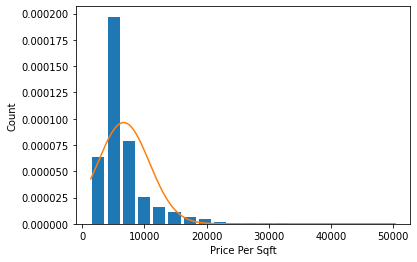

In [15]:
hist=plt.hist(df2['price_per_sqft'],bins=20,rwidth=0.8,density=True)
plt.xlabel('Price Per Sqft')
plt.ylabel('Count')
rng=np.arange(df2['price_per_sqft'].min(),df2['price_per_sqft'].max(),0.1)
plt.plot(rng,norm.pdf(rng,df2['price_per_sqft'].mean(),df2['price_per_sqft'].std()))

In [17]:
maxlimit=df2['price_per_sqft'].mean() + 4* df2['price_per_sqft'].std()
minlimit=df2['price_per_sqft'].mean() - 4* df2['price_per_sqft'].std()

maxlimit,minlimit

(23227.73653589432, -9900.429065502582)

In [18]:
df3=df2[(df2['price_per_sqft']>minlimit) & (df2['price_per_sqft']<maxlimit)]

In [20]:
df2.shape[0]-df3.shape[0]

125

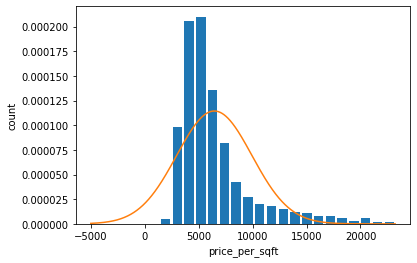

In [22]:
plt.hist(df3['price_per_sqft'],bins=20,rwidth=0.8,density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
rng=np.arange(-5000,df3['price_per_sqft'].max(),0.1)
plt.plot(rng,norm.pdf(rng,df3['price_per_sqft'].mean(),df3['price_per_sqft'].std()))

## Using Z score

In [23]:
df2['z score']=(df2['price_per_sqft']-df2['price_per_sqft'].mean())/(df2['price_per_sqft'].std())

C:\Users\Siddhanth\AppData\Local\Temp\ipykernel_22352\2777011283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['z score']=(df2['price_per_sqft']-df2['price_per_sqft'].mean())/(df2['price_per_sqft'].std())


In [24]:
df2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z score
10431,Sarjapur Road,4 Bedroom,2880.0,3.0,211.0,4,7326,0.159948
11779,Hennur Road,3 BHK,1672.0,3.0,86.0,3,5143,-0.367217
5155,other,8 Bedroom,1200.0,7.0,100.0,8,8333,0.403124
5212,Bhoganhalli,4 BHK,1974.0,4.0,106.0,4,5369,-0.312641
8746,Bisuvanahalli,3 BHK,1180.0,2.0,55.5,3,4703,-0.473471
4319,Nagarbhavi,3 BHK,1515.0,2.0,79.0,3,5214,-0.350072
1758,Kodigehaali,2 BHK,1200.0,2.0,55.0,2,4583,-0.502449
11088,other,6 Bedroom,2400.0,7.0,107.0,6,4458,-0.532635
4260,Sarjapur Road,2 BHK,1308.0,2.0,83.0,2,6345,-0.076951
5167,Jigani,3 BHK,1221.0,3.0,72.0,3,5896,-0.185378


In [27]:
df4=df2[(df2['z score']>-4) & (df2['z score']<4)]

In [28]:
df2.shape[0]-df4.shape[0]

125

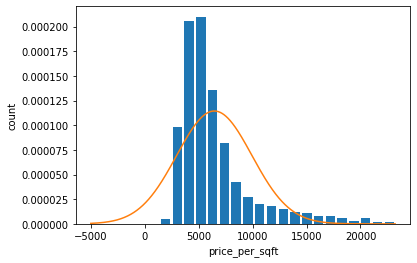

In [29]:
plt.hist(df4['price_per_sqft'],bins=20,rwidth=0.8,density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
rng=np.arange(-5000,df4['price_per_sqft'].max(),0.1)
plt.plot(rng,norm.pdf(rng,df4['price_per_sqft'].mean(),df4['price_per_sqft'].std()))